<img src="https://pbs.twimg.com/profile_images/1092394418135539713/eplLRcDN_400x400.jpg" width=80px style="text-align:right"><h1>The Internet of Production Alliance </h1>

## Preliminary data report for the [Make Project](https://makeafricaeu.org/)


Autor: Antonio de Jesus Anaya Hernandez, DevOps eng. for the IoPA.

Autor: The internet of Production Alliance, 2023.

Data was collected by "Fab Foundation", location: https://api.fablabs.io/0/labs.json

The Open Know Where (OKW) Standard is part of the Internet of Production Alliance and its members.

License: CC BY SA

![CC BY SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
import concurrent.futures

machines_list = []

def binary_search(url):
    left = 0
    right = 1000
    while left <= right:
        mid = (left + right) // 2
        r = requests.get(url + str(mid))
        if r.status_code == 200:
            page_content = BeautifulSoup(r.content, 'html.parser')
            machine_data = page_content.select('div.machines > div.machine > div.card div > a', limit=0)
            machines = [content['href'][10:] for content in machine_data if content['href'][:9] == '/machines']
            if len(machines) > 0:
                left = mid + 1
            else:
                right = mid - 1
    return (right, machines)

machines_url = 'https://fablabs.io/machines/?page='

binary_search(machines_url)

In [3]:
def get_machines_list(url, pages):
    machines_list = []
    for page in range(1, pages+1):
        r = requests.get(url + str(page))
        if r.status_code == 200:
            page_content = BeautifulSoup(r.content, 'html.parser')
            machine_data = page_content.select('div.machines > div.machine > div.card div > a', limit=0)
            machines = list(set([content['href'][10:] for content in machine_data if content['href'][:9] == '/machines']))
            if len(machines) > 0:
                machines_list.extend(machines)
            else:
                return machines_list

class page_count:
    def __iter__(self):
        i = 0
        while True:
            yield i
            i += 1

def get_machines_list(count):
    url = 'https://fablabs.io/machines/?page='
    page = requests.get(url + str(count))
    if page.status_code == 200:
        page_content = BeautifulSoup(page.content, 'html.parser')
        machine_data = page_content.select('div.machines > div.machine > div.card div > a', limit=0)
        return list(set([content['href'][10:] for content in machine_data if content['href'][:9] == '/machines']))
    else:
        return False

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as pager:
    c = page_count()
    pages = [pager.submit(get_machines_list, int(c)) for int(c) in range(c)]
    
    machines_list = [future.result() for future in concurrent.futures.as_completed(pages)]

machines_url = 'https://fablabs.io/machines/?page='

def get_machines_page(url):
    r = requests.get(url)
    code = r.status_code
    if code == 200:
        page_content = BeautifulSoup(r.content, 'html.parser')
        machine_data = page_content.select('div.machines > div.machine > div.card div > a', limit=0)
        machines = set([content['href'][10:] for content in machine_data if content['href'][:9] == '/machines'])
        return machines
    else:
        return False

def get_machines_list(url):
    machines_list = set()
    index = 1
    while True:
        page_machines = get_machines_page(url + str(index))
        if page_machines[0] != 200:
            break
        machines_list.update(page_machines[1])
        index += 1
    return list(machines_list)

def fetch_machines(url):
    with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
        future_machines = [executor.submit(get_machines_page, url + str(i)) for i in range(0, 1000)]
        machines_list = set()
        for future in concurrent.futures.as_completed(future_machines):
            machines = future.result()
            if len(machines) == 0:
                break
            machines_list.update(machines)
    return list(machines_list)


machines_list = fetch_machines(machines_url)

In [78]:
len(machines_list)

380

In [65]:
machines_list

['absolute-arm',
 'gtmax3d-core-h4',
 'styrocut-3',
 'vls-6-60',
 'srm-20-monofab',
 'lc-kit',
 'x900-100w',
 'incubated-shakers-floor',
 'factory-2-0',
 'falling-weight-tester',
 'ox-cnc',
 'blood-bank-and-blood-storage-refrigerators',
 'metalyser',
 'climatic-chamber-for-test-humidity-and-temperature-for-your-samples',
 'cm160x-laser-machine-discription',
 'sense-3d-scanner',
 'deltawasp-4070',
 'low-temp-incubator-2-4-chamber',
 'tal-brabo',
 'legend-36ext',
 'universal-tensile-tester-2c6d7bb9-6d07-4895-b08b-fce134dc7531',
 'gks-190-professional',
 'ultimaker',
 'kitmill-rd300',
 'speedy-100',
 'routeur-cnc-rs-1313r-opensource',
 'temp-humid-chambers',
 'ultra-low-temperature-freezer-choose-the-product-that-suits-you-best',
 'alu-line-1110',
 'fireball-v90',
 'innovis-100',
 'aeqon-400',
 'optimum',
 'zmorph-2-0-sx',
 'legend-mini-24',
 'gv1309',
 'legend-helix-24',
 'cnc-9060',
 'kh-750',
 'u20',
 'scanify',
 'zmorph-2-0sx-multitool',
 'universal-tensile-tester',
 'speedy-300',
 'i

In [11]:
machines_count = 0
def get_machine_data(url):
    global machines_count
    r = requests.get('https://fablabs.io/machines/' + url)
    
    if r.status_code == 200:
        page_content = BeautifulSoup(r.content, 'html.parser')
        labs_data = page_content.select('div.side > ul.list-unstyled > li > a', limit=0)
        labs = [content['href'][6:] for content in labs_data if content['href'][:5] == '/labs']
        machine_data = page_content.select('div.row > div.col-lg-8')
        machine_info = [x.text.replace("\n", "") for x in machine_data[0].children if x != '\n' and len(x.text) >= 1]
        tag_data = page_content.select('div.side > ul.taglist > li > strong > a', limit=0)
        tag_info = [content['href'][14:].replace("+", "_").replace("_%26_","_") for content in tag_data if content['href'][:9] == '/machines']
        # print(url)
        # print(machine_info)
        
        if len(labs) > 0:
            machines_count += len(labs)        
            return {'name':machine_info[1],'brand':machine_info[0],'labs':labs,'tags':tag_info}
        else:
            return url
    else:
        return (url, r.status_code)

In [12]:
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    future_results = [executor.submit(get_machine_data, url) for url in machines_list]
    
    results = [future.result() for future in concurrent.futures.as_completed(future_results)]

In [47]:
len(results)

420

In [48]:
results

['gtmax3d-core-h4',
 {'name': 'Redsail X900 100W lasercut',
  'brand': 'Redsail',
  'labs': ['fablabbergamo', 'infoaleze', 'fablabina'],
  'tags': []},
 'lc-kit',
 {'name': 'Styrocut 3',
  'brand': 'Styrocut',
  'labs': ['laboratoriodeartesaniadigital', 'batchspace'],
  'tags': []},
 {'name': 'VLS 6.60',
  'brand': 'Universal Laser Systems',
  'labs': ['fablabdanmark',
   'fablabue',
   'iutlabreunion',
   'fablabgwangju',
   'letierslieudecarpentras',
   'mosineefablab',
   'fablabguldborgsund',
   'fablabgdl',
   'fabdefab',
   'haystackfablab'],
  'tags': ['Laser_Engraving_Cutting']},
 {'name': 'SRM-20 MonoFab',
  'brand': 'Roland',
  'labs': ['fablabiedmadrid',
   'fablabjordan',
   'riidl',
   'FabLabRwanda',
   'FabLabAntwerpen',
   'SmartlabCarinthia',
   'fablabucal',
   'criwerkstaettewattens',
   'crunchlab',
   'fablabuaebus',
   'fablabnapoli',
   'fablabetsidi',
   'fablabterrassa',
   'fablabsantcugat',
   'batchspace',
   'pontio',
   'akgecfablab',
   'fablabraseko',
  

In [49]:
# results = [get_machine_data(x) for x in machines_list]

In [50]:
machines_count

2002

In [17]:
machines = pd.DataFrame([x for x in results if type(x) is dict])

In [18]:
machines.shape

(336, 4)

In [19]:
machines['machine_count'] = machines['labs'].str.len()

In [20]:
machines.set_index('name')

,brand,labs,tags,machine_count
name,,,,
Redsail X900 100W lasercut,Redsail,"[fablabbergamo, infoaleze, fablabina]",[],3
Styrocut 3,Styrocut,"[laboratoriodeartesaniadigital, batchspace]",[],2
VLS 6.60,Universal Laser Systems,"[fablabdanmark, fablabue, iutlabreunion, fabla...",[Laser_Engraving_Cutting],10
SRM-20 MonoFab,Roland,"[fablabiedmadrid, fablabjordan, riidl, FabLabR...",[precision_milling],46
RedSail CM160X laser machine discription,Redsail,[fablabina],[],1
...,...,...,...,...
Duplicator 7,Wanhao,"[labsudmontpellier, fablabconegliano]",[],2
Academia 20,Creaform,[fablabterrassa],[%233D_scanner],1
Raise 3d n2 plas,Raise 3D,"[devincifablab, handwerkstadt, fablabunsa, fab...",[],7


In [21]:
machines.machine_count.sum()

2002

In [22]:
machines.machine_count.max()

68

<AxesSubplot:>

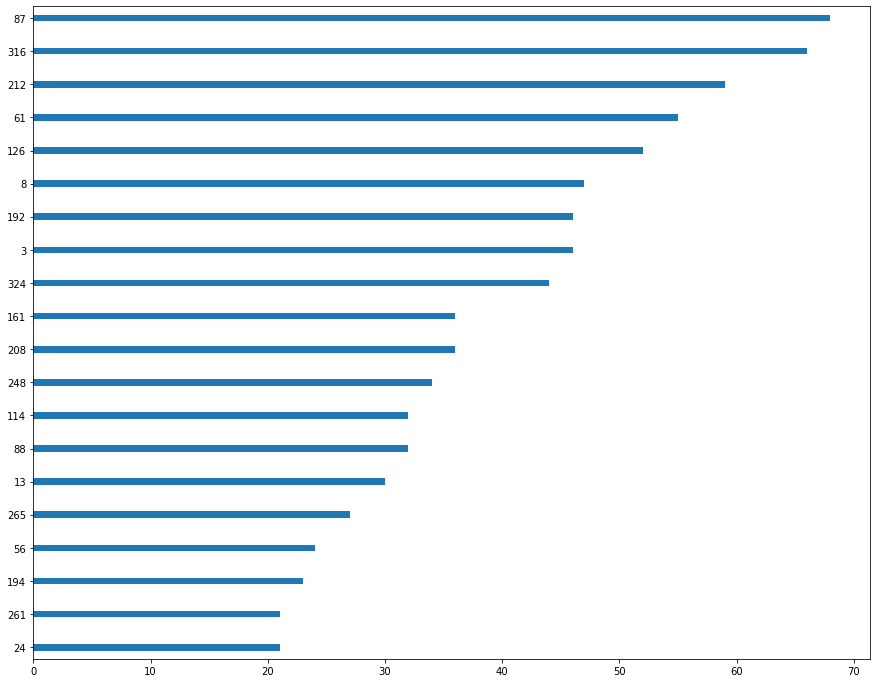

In [23]:
machines['machine_count'].sort_values(ascending=True).tail(20).plot(kind='barh', rot=0, width=0.2, align='center', figsize=(15,12))

In [24]:
machines['checked_tags'] = machines['tags'].apply(lambda x: [tag.replace('%23', '').replace('%3B', '').replace('%C2%AD', '').replace('%C3%A9', 'e').lower() for tag in x])

In [25]:
tags = {tag for row in machines['checked_tags'] for tag in row}

In [26]:
machines.tags

0                             []
1                             []
2      [Laser_Engraving_Cutting]
3            [precision_milling]
4                             []
                 ...            
331                           []
332              [%233D_scanner]
333                           []
334                [3D_Printing]
335                [3D_Printing]
Name: tags, Length: 336, dtype: object

In [27]:
machines['checked_tags']

0                             []
1                             []
2      [laser_engraving_cutting]
3            [precision_milling]
4                             []
                 ...            
331                           []
332                 [3d_scanner]
333                           []
334                [3d_printing]
335                [3d_printing]
Name: checked_tags, Length: 336, dtype: object

In [28]:
three_d_printers = [x for x in tags if '3d' in x and not 'sca' in x]

In [29]:
three_d_printers

['3d',
 '3dprinter_a_3d_printer',
 '3dp',
 '3d_machine',
 'sethi3d_s3',
 '3d_print_carbon_fiber',
 'fdm_desktop_3d_printer',
 '3d_printer',
 'delta_3d_printer',
 'a_3d_printer3dprinter',
 'dlp_3d_printer',
 '3d_printer_reprap_prusa_i3',
 'lynx_3d',
 '3d_printing',
 'gtmax_gtmax3d_brasil_brazil',
 '3dprinting',
 'resin_lcd_gtmax_gtmax3d_3dprint_3dprinter_brasil_brazil_fablab',
 '3dpriner',
 '3dprinter']

In [30]:
cnc_milling = [x for x in tags if 'cnc' in x and not 'prec' in x and not 'laser' in x]

In [31]:
cnc_milling

['cnc_foam',
 'cnc_milling',
 'cnc_carving',
 'cnc_router',
 'cnc',
 'wood_lathe_cnc_machine',
 'cnc_lathe',
 'milling_cnc',
 'cnc_wood_lathe',
 'desktop_cnc',
 'cnc-milling']

In [32]:
laser = [x for x in tags if 'laser' in x]

In [33]:
laser

['laser-engraving',
 'laser_engraving',
 'laser_cut',
 'laser_cutting',
 'laser_engraver',
 'laser',
 'co2_laser_cutter',
 'thunder_laser',
 'laser_engraver_cutter_metal',
 'laser_engraving_machine',
 'laser_engraving_cutting',
 'lasercut',
 'laser_cutter']

In [34]:
circuit_production = [x for x in tags if 'pcb' in x]

In [35]:
circuit_production


['pcb_milling']

In [36]:
precision_milling = [x for x in tags if 'prec' in x]

In [37]:
precision_milling

['precisionmilling',
 'precision_cnc_milling',
 'precison_milling',
 'precision_milling']

In [38]:
vinyl_cutting = [x for x in tags if 'vinyl' in x]

In [39]:
vinyl_cutting

['vinyl_cutting', 'vinyl_cutter_plotter', 'vinyl_cutter', 'vinyl']

In [40]:
classified_tags = set(three_d_printers).union(cnc_milling).union(laser).union(circuit_production).union(precision_milling).union(vinyl_cutting)

In [41]:
print(classified_tags)

{'vinyl_cutter', 'cnc_lathe', 'laser-engraving', 'laser_engraving', 'cnc_foam', '3d_printer', 'delta_3d_printer', 'milling_cnc', '3d', 'a_3d_printer3dprinter', 'laser_cut', 'lasercut', '3d_machine', 'gtmax_gtmax3d_brasil_brazil', 'vinyl_cutter_plotter', 'thunder_laser', 'co2_laser_cutter', 'dlp_3d_printer', 'laser_engraver_cutter_metal', 'precison_milling', '3d_printer_reprap_prusa_i3', 'pcb_milling', 'vinyl_cutting', '3dprinting', 'cnc_carving', 'laser_cutting', 'lynx_3d', 'sethi3d_s3', 'laser_engraving_machine', 'cnc_wood_lathe', 'vinyl', 'precisionmilling', 'precision_milling', 'laser_engraver', 'cnc_router', 'resin_lcd_gtmax_gtmax3d_3dprint_3dprinter_brasil_brazil_fablab', '3dpriner', 'cnc', '3dprinter_a_3d_printer', 'wood_lathe_cnc_machine', 'laser', '3d_print_carbon_fiber', 'laser_engraving_cutting', 'cnc_milling', '3dprinter', '3dp', 'precision_cnc_milling', 'laser_cutter', '3d_printing', 'desktop_cnc', 'cnc-milling', 'fdm_desktop_3d_printer'}


In [42]:
tags.difference(classified_tags)

{'2_extruders',
 '3d_scanner',
 '3d_scanning',
 '3mm',
 '450mc',
 '900mc',
 'a8',
 'abs',
 'aggressive_cleaning_ability_in_a_variety_of_output_modes%21',
 'air',
 'aluminum',
 'anet',
 'arduino',
 'bandsaw',
 'binderjet',
 'blade',
 'centrifugal_multi_proposes',
 'cjp',
 'compressor',
 'concept',
 'cutter',
 'cutting',
 'cutting_ploter',
 'decapant',
 'desolder',
 'dfkit',
 'digital_sewing',
 'dlp',
 'drill',
 'drilling_machine',
 'embossing',
 'embroidery',
 'extruder',
 'f900',
 'fablab',
 'facens',
 'farbricprinter',
 'fdm',
 'fed',
 'fff',
 'fiber_engraving',
 'filament',
 'foamcutter',
 'folding',
 'formlabs',
 'formlabs2',
 'fortus',
 'fullcolor',
 'fume_hoods',
 'heated_bed',
 'hot_air',
 'hotwire',
 'knitting',
 'lab-on-a-chip',
 'laboratory_ovens',
 'large_and_tall_dimensions_with_3_tier_pull-out_storage_drawers.',
 'm200',
 'manual_mechanical_lathe',
 'manual_milling_machine',
 'mfr%2fmvr_tester',
 'milling',
 'millingmachine',
 'miter_saw',
 'modular',
 'notch_milling_machin

In [43]:
tags

{'2_extruders',
 '3d',
 '3d_machine',
 '3d_print_carbon_fiber',
 '3d_printer',
 '3d_printer_reprap_prusa_i3',
 '3d_printing',
 '3d_scanner',
 '3d_scanning',
 '3dp',
 '3dpriner',
 '3dprinter',
 '3dprinter_a_3d_printer',
 '3dprinting',
 '3mm',
 '450mc',
 '900mc',
 'a8',
 'a_3d_printer3dprinter',
 'abs',
 'aggressive_cleaning_ability_in_a_variety_of_output_modes%21',
 'air',
 'aluminum',
 'anet',
 'arduino',
 'bandsaw',
 'binderjet',
 'blade',
 'centrifugal_multi_proposes',
 'cjp',
 'cnc',
 'cnc-milling',
 'cnc_carving',
 'cnc_foam',
 'cnc_lathe',
 'cnc_milling',
 'cnc_router',
 'cnc_wood_lathe',
 'co2_laser_cutter',
 'compressor',
 'concept',
 'cutter',
 'cutting',
 'cutting_ploter',
 'decapant',
 'delta_3d_printer',
 'desktop_cnc',
 'desolder',
 'dfkit',
 'digital_sewing',
 'dlp',
 'dlp_3d_printer',
 'drill',
 'drilling_machine',
 'embossing',
 'embroidery',
 'extruder',
 'f900',
 'fablab',
 'facens',
 'farbricprinter',
 'fdm',
 'fdm_desktop_3d_printer',
 'fed',
 'fff',
 'fiber_engravin

In [44]:
machines['classified'] = machines['checked_tags'].apply(lambda x: [tag in classified_tags for tag in x])

In [45]:
tags

{'2_extruders',
 '3d',
 '3d_machine',
 '3d_print_carbon_fiber',
 '3d_printer',
 '3d_printer_reprap_prusa_i3',
 '3d_printing',
 '3d_scanner',
 '3d_scanning',
 '3dp',
 '3dpriner',
 '3dprinter',
 '3dprinter_a_3d_printer',
 '3dprinting',
 '3mm',
 '450mc',
 '900mc',
 'a8',
 'a_3d_printer3dprinter',
 'abs',
 'aggressive_cleaning_ability_in_a_variety_of_output_modes%21',
 'air',
 'aluminum',
 'anet',
 'arduino',
 'bandsaw',
 'binderjet',
 'blade',
 'centrifugal_multi_proposes',
 'cjp',
 'cnc',
 'cnc-milling',
 'cnc_carving',
 'cnc_foam',
 'cnc_lathe',
 'cnc_milling',
 'cnc_router',
 'cnc_wood_lathe',
 'co2_laser_cutter',
 'compressor',
 'concept',
 'cutter',
 'cutting',
 'cutting_ploter',
 'decapant',
 'delta_3d_printer',
 'desktop_cnc',
 'desolder',
 'dfkit',
 'digital_sewing',
 'dlp',
 'dlp_3d_printer',
 'drill',
 'drilling_machine',
 'embossing',
 'embroidery',
 'extruder',
 'f900',
 'fablab',
 'facens',
 'farbricprinter',
 'fdm',
 'fdm_desktop_3d_printer',
 'fed',
 'fff',
 'fiber_engravin

In [46]:
machines.classified

0           []
1           []
2       [True]
3       [True]
4           []
        ...   
331         []
332    [False]
333         []
334     [True]
335     [True]
Name: classified, Length: 336, dtype: object